<a href="https://colab.research.google.com/github/PosgradoMNA/actividades-del-projecto-equipo_114/blob/main/Reto1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [334]:
pip install geopandas

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 1.0 MB 4.7 MB/s 
     |████████████████████████████████| 16.7 MB 391 kB/s 
     |████████████████████████████████| 6.3 MB 41.6 MB/s 


In [337]:
import pandas as pd
import numpy as np
import io
import requests
import urllib.request
import csv
import seaborn as sns
import matplotlib.pyplot as plt
import geopandas as gpd
from shapely.geometry import Point

pd.set_option('display.max_columns', None)

In [290]:
url1 = 'https://raw.githubusercontent.com/PosgradoMNA/actividades-del-projecto-equipo_114/main/Reto1/Datos_de_calidad_del_agua_de_sitios_de_monitoreo_de_aguas_subterraneas_2020.csv'
url2 = 'https://raw.githubusercontent.com/PosgradoMNA/actividades-del-projecto-equipo_114/main/Reto1/Datos_de_calidad_del_agua_de_sitios_de_monitoreo_de_aguas_superficiales_2020.csv'

In [291]:
df_sub = pd.read_csv(url1, encoding_errors='ignore', error_bad_lines=False)
df_sup = pd.read_csv(url2, encoding_errors='ignore', error_bad_lines=False)

/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:3326: FutureWarning: The error_bad_lines argument has been deprecated and will be removed in a future version.


  exec(code_obj, self.user_global_ns, self.user_ns)


In [292]:
#Explorar columnas

In [293]:
df_sub.columns

Index(['CLAVE', 'SITIO', 'ORGANISMO_DE_CUENCA', 'ESTADO', 'MUNICIPIO',
       'ACUIFERO', 'SUBTIPO', 'LONGITUD', 'LATITUD', 'PERIODO', 'ALC_mg/L',
       'CALIDAD_ALC', 'CONDUCT_mS/cm', 'CALIDAD_CONDUC', 'SDT_mg/L',
       'SDT_M_mg/L', 'CALIDAD_SDT_ra', 'CALIDAD_SDT_salin', 'FLUORUROS_mg/L',
       'CALIDAD_FLUO', 'DUR_mg/L', 'CALIDAD_DUR', 'COLI_FEC_NMP/100_mL',
       'CALIDAD_COLI_FEC', 'N_NO3_mg/L', 'CALIDAD_N_NO3', 'AS_TOT_mg/L',
       'CALIDAD_AS', 'CD_TOT_mg/L', 'CALIDAD_CD', 'CR_TOT_mg/L', 'CALIDAD_CR',
       'HG_TOT_mg/L', 'CALIDAD_HG', 'PB_TOT_mg/L', 'CALIDAD_PB', 'MN_TOT_mg/L',
       'CALIDAD_MN', 'FE_TOT_mg/L', 'CALIDAD_FE', 'SEMAFORO', 'CONTAMINANTES',
       'CUMPLE_CON_ALC', 'CUMPLE_CON_COND', 'CUMPLE_CON_SDT_ra',
       'CUMPLE_CON_SDT_salin', 'CUMPLE_CON_FLUO', 'CUMPLE_CON_DUR',
       'CUMPLE_CON_CF', 'CUMPLE_CON_NO3', 'CUMPLE_CON_AS', 'CUMPLE_CON_CD',
       'CUMPLE_CON_CR', 'CUMPLE_CON_HG', 'CUMPLE_CON_PB', 'CUMPLE_CON_MN',
       'CUMPLE_CON_FE'],
      dtype='

In [294]:
df_sup.columns

Index(['CLAVE', 'SITIO', 'ORGANISMO_DE_CUENCA', 'ESTADO', 'MUNICIPIO',
       'CUENCA', 'CUERPO DE AGUA', 'TIPO', 'SUBTIPO', 'LONGITUD', 'LATITUD',
       'PERIODO', 'DBO_mg/L', 'CALIDAD_DBO', 'DQO_mg/L', 'CALIDAD_DQO',
       'SST_mg/L', 'CALIDAD_SST', 'COLI_FEC_NMP_100mL', 'CALIDAD_COLI_FEC',
       'E_COLI_NMP_100mL', 'CALIDAD_E_COLI', 'ENTEROC_NMP_100mL',
       'CALIDAD_ENTEROC', 'OD_PORC', 'CALIDAD_OD_PORC', 'OD_PORC_SUP',
       'CALIDAD_OD_PORC_SUP', 'OD_PORC_MED', 'CALIDAD_OD_PORC_MED',
       'OD_PORC_FON', 'CALIDAD_OD_PORC_FON', 'TOX_D_48_UT', 'CALIDAD_TOX_D_48',
       'TOX_V_15_UT', 'CALIDAD_TOX_V_15', 'TOX_D_48_SUP_UT',
       'CALIDAD TOX_D_48_SUP', 'TOX_D_48_FON_UT', 'CALIDAD_TOX_D_48_FON',
       'TOX_FIS_SUP_15_UT', 'CALIDAD_TOX_FIS_SUP_15', 'TOX_FIS_FON_15_UT',
       'CALIDAD_TOX_FIS_FON_15', 'SEMAFORO', 'CONTAMINANTES', 'CUMPLE_CON_DBO',
       'CUMPLE_CON_DQO', 'CUMPLE_CON_SST', 'CUMPLE_CON_CF',
       'CUMPLE_CON_E_COLI', 'CUMPLE_CON_ENTEROC', 'CUMPLE_CON_OD',
  

In [295]:
# Shape, NANs, Info
print(df_sup.shape)
df_sup.isna().sum()/df_sup.shape[0]

(3493, 55)


CLAVE                     0.000000
SITIO                     0.000000
ORGANISMO_DE_CUENCA       0.000000
ESTADO                    0.000000
MUNICIPIO                 0.000000
CUENCA                    0.000286
CUERPO DE AGUA            0.004008
TIPO                      0.000000
SUBTIPO                   0.004008
LONGITUD                  0.000000
LATITUD                   0.000000
PERIODO                   0.000000
DBO_mg/L                  0.261094
CALIDAD_DBO               0.261094
DQO_mg/L                  0.261094
CALIDAD_DQO               0.261094
SST_mg/L                  0.001145
CALIDAD_SST               0.001145
COLI_FEC_NMP_100mL        0.260807
CALIDAD_COLI_FEC          0.260807
E_COLI_NMP_100mL          0.260807
CALIDAD_E_COLI            0.260807
ENTEROC_NMP_100mL         0.741197
CALIDAD_ENTEROC           0.741197
OD_PORC                   0.485543
CALIDAD_OD_PORC           0.485543
OD_PORC_SUP               0.536502
CALIDAD_OD_PORC_SUP       0.536502
OD_PORC_MED         

In [296]:
df_sup.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3493 entries, 0 to 3492
Data columns (total 55 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   CLAVE                   3493 non-null   object 
 1   SITIO                   3493 non-null   object 
 2   ORGANISMO_DE_CUENCA     3493 non-null   object 
 3   ESTADO                  3493 non-null   object 
 4   MUNICIPIO               3493 non-null   object 
 5   CUENCA                  3492 non-null   object 
 6   CUERPO DE AGUA          3479 non-null   object 
 7   TIPO                    3493 non-null   object 
 8   SUBTIPO                 3479 non-null   object 
 9   LONGITUD                3493 non-null   float64
 10  LATITUD                 3493 non-null   float64
 11  PERIODO                 3493 non-null   int64  
 12  DBO_mg/L                2581 non-null   object 
 13  CALIDAD_DBO             2581 non-null   object 
 14  DQO_mg/L                2581 non-null   

In [297]:
# Shape, NANs, Info
print(df_sub.shape)
df_sub.isna().sum()

(1068, 57)


CLAVE                      0
SITIO                      0
ORGANISMO_DE_CUENCA        0
ESTADO                     0
MUNICIPIO                  0
ACUIFERO                   0
SUBTIPO                    0
LONGITUD                   0
LATITUD                    0
PERIODO                    0
ALC_mg/L                   4
CALIDAD_ALC                4
CONDUCT_mS/cm              6
CALIDAD_CONDUC             6
SDT_mg/L                1068
SDT_M_mg/L                 2
CALIDAD_SDT_ra             2
CALIDAD_SDT_salin          2
FLUORUROS_mg/L             0
CALIDAD_FLUO               0
DUR_mg/L                   1
CALIDAD_DUR                1
COLI_FEC_NMP/100_mL        0
CALIDAD_COLI_FEC           0
N_NO3_mg/L                 1
CALIDAD_N_NO3              1
AS_TOT_mg/L                0
CALIDAD_AS                 0
CD_TOT_mg/L                0
CALIDAD_CD                 0
CR_TOT_mg/L                0
CALIDAD_CR                 0
HG_TOT_mg/L                0
CALIDAD_HG                 0
PB_TOT_mg/L   

In [298]:
# Diferentes columnas entre data sets
set(df_sub.columns).difference(set(df_sup.columns))

{'ACUIFERO',
 'ALC_mg/L',
 'AS_TOT_mg/L',
 'CALIDAD_ALC',
 'CALIDAD_AS',
 'CALIDAD_CD',
 'CALIDAD_CONDUC',
 'CALIDAD_CR',
 'CALIDAD_DUR',
 'CALIDAD_FE',
 'CALIDAD_FLUO',
 'CALIDAD_HG',
 'CALIDAD_MN',
 'CALIDAD_N_NO3',
 'CALIDAD_PB',
 'CALIDAD_SDT_ra',
 'CALIDAD_SDT_salin',
 'CD_TOT_mg/L',
 'COLI_FEC_NMP/100_mL',
 'CONDUCT_mS/cm',
 'CR_TOT_mg/L',
 'CUMPLE_CON_ALC',
 'CUMPLE_CON_AS',
 'CUMPLE_CON_CD',
 'CUMPLE_CON_COND',
 'CUMPLE_CON_CR',
 'CUMPLE_CON_DUR',
 'CUMPLE_CON_FE',
 'CUMPLE_CON_FLUO',
 'CUMPLE_CON_HG',
 'CUMPLE_CON_MN',
 'CUMPLE_CON_NO3',
 'CUMPLE_CON_PB',
 'CUMPLE_CON_SDT_ra',
 'CUMPLE_CON_SDT_salin',
 'DUR_mg/L',
 'FE_TOT_mg/L',
 'FLUORUROS_mg/L',
 'HG_TOT_mg/L',
 'MN_TOT_mg/L',
 'N_NO3_mg/L',
 'PB_TOT_mg/L',
 'SDT_M_mg/L',
 'SDT_mg/L'}

In [299]:
# Columnas compartidas entre data sets
set(df_sub.columns) & (set(df_sup.columns))

{'CALIDAD_COLI_FEC',
 'CLAVE',
 'CONTAMINANTES',
 'CUMPLE_CON_CF',
 'ESTADO',
 'LATITUD',
 'LONGITUD',
 'MUNICIPIO',
 'ORGANISMO_DE_CUENCA',
 'PERIODO',
 'SEMAFORO',
 'SITIO',
 'SUBTIPO'}

# Exploración y limpieza de datos
# Aguas subterraneas


### MAPEO DE INDICADORES DE CALIDAD:

In [300]:
print(df_sub['CALIDAD_COLI_FEC'].isna().sum())
print(df_sub['CALIDAD_COLI_FEC'].unique())
df_sub['CALIDAD_COLI_FEC'].replace({
    'Potable - Excelente':1,
    'Buena calidad':1,
    'Aceptable':0,
    'Contaminada':-1,
    'Fuertemente contaminada':-1
}, inplace=True)

0
['Potable - Excelente' 'Aceptable' 'Contaminada' 'Buena calidad'
 'Fuertemente contaminada']


In [301]:
print(df_sub['CALIDAD_SDT_ra'].isna().sum())
print(df_sub['CALIDAD_SDT_ra'].unique())
df_sub['CALIDAD_SDT_ra'].fillna(df_sub['CALIDAD_SDT_ra'].mode().iloc[0], inplace=True)
df_sub['CALIDAD_SDT_ra'].replace({
    'Excelente para riego':1,
    'Cultivos sensibles':1,
    'Cultivos con manejo especial':1,
    'Cultivos tolerantes':0,
    'Indeseable para riego':-1
}, inplace=True)

2
['Cultivos sensibles' 'Excelente para riego'
 'Cultivos con manejo especial' 'Cultivos tolerantes'
 'Indeseable para riego' nan]


In [302]:
print(df_sub['CALIDAD_SDT_salin'].isna().sum())
print(df_sub['CALIDAD_SDT_salin'].unique())
df_sub['CALIDAD_SDT_salin'].fillna(df_sub['CALIDAD_SDT_salin'].mode().iloc[0], inplace=True)
df_sub['CALIDAD_SDT_salin'].replace({
    'Potable - Dulce':1,
    'Ligeramente salobres':0,
    'Salobres':0,
    'Salinas':-1
}, inplace=True)

2
['Potable - Dulce' 'Ligeramente salobres' 'Salobres' 'Salinas' nan]


In [303]:
print(df_sub['CALIDAD_CR'].isna().sum())
print(df_sub['CALIDAD_CR'].unique())
df_sub['CALIDAD_CR'].replace({
    'Potable - Excelente':1,
    'No apta como FAAP':-1
}, inplace=True)

0
['Potable - Excelente' 'No apta como FAAP']


In [304]:
print(df_sub['CALIDAD_CONDUC'].isna().sum())
print(df_sub['CALIDAD_CONDUC'].unique())
df_sub['CALIDAD_CONDUC'].fillna(df_sub['CALIDAD_CONDUC'].mode().iloc[0], inplace=True)
df_sub['CALIDAD_CONDUC'].replace({
    'Permisible para riego':0,
    'Buena para riego':1,
    'Excelente para riego':1,
    'Dudosa para riego':-1,
    'Indeseable para riego':-1
},inplace=True)

6
['Permisible para riego' 'Buena para riego' 'Dudosa para riego'
 'Indeseable para riego' nan 'Excelente para riego']


In [305]:
print(df_sub['CALIDAD_CD'].isna().sum())
print(df_sub['CALIDAD_CD'].unique())
df_sub['CALIDAD_CD'].replace({
    'Potable - Excelente':1,
    'No apta como FAAP':-1
}, inplace=True)

0
['Potable - Excelente' 'No apta como FAAP']


In [306]:
print(df_sub['CALIDAD_AS'].isna().sum())
print(df_sub['CALIDAD_AS'].unique())
df_sub['CALIDAD_AS'].replace({
    'Apta como FAAP':0,
    'No apta como FAAP':-1,
    'Potable - Excelente':1,
}, inplace=True)

0
['Apta como FAAP' 'No apta como FAAP' 'Potable - Excelente']


In [307]:
print(df_sub['CALIDAD_ALC'].isna().sum())
print(df_sub['CALIDAD_ALC'].unique())
df_sub['CALIDAD_ALC'].fillna(df_sub['CALIDAD_ALC'].mode().iloc[0], inplace=True)
df_sub['CALIDAD_ALC'].replace({
    'Alta':1,
    'Media':0,
    'Baja':-1,
    'Indeseable como FAAP':-1,
}, inplace=True)

4
['Alta' 'Media' 'Baja' 'Indeseable como FAAP' nan]


In [308]:
print(df_sub['CALIDAD_PB'].isna().sum())
print(df_sub['CALIDAD_PB'].unique())
df_sub['CALIDAD_PB'].replace({
    'Potable - Excelente':1,
    'No apta como FAAP':-1,
}, inplace=True)

0
['Potable - Excelente' 'No apta como FAAP']


In [309]:
print(df_sub['CALIDAD_N_NO3'].isna().sum())
print(df_sub['CALIDAD_N_NO3'].unique())
df_sub['CALIDAD_N_NO3'].fillna(df_sub['CALIDAD_N_NO3'].mode().iloc[0], inplace=True)
df_sub['CALIDAD_N_NO3'].replace({
    'Potable - Excelente':1,
    'Potable - Buena calidad':0,
    'No apta como FAAP':-1,
}, inplace=True)


1
['Potable - Excelente' 'Potable - Buena calidad' 'No apta como FAAP' nan]


In [310]:
print(df_sub['CALIDAD_MN'].isna().sum())
print(df_sub['CALIDAD_MN'].unique())
df_sub['CALIDAD_MN'].replace({
    'Potable - Excelente':1,
    'Puede afectar la salud':-1,
    'Sin efectos en la salud - Puede dar color al agua':-1,
}, inplace=True)

0
['Potable - Excelente' 'Puede afectar la salud'
 'Sin efectos en la salud - Puede dar color al agua']


In [311]:
print(df_sub['CALIDAD_HG'].isna().sum())
print(df_sub['CALIDAD_HG'].unique())
df_sub['CALIDAD_HG'].replace({
    'Potable - Excelente':1,
    'No apta como FAAP':-1,
}, inplace=True)

0
['Potable - Excelente' 'No apta como FAAP']


In [312]:
print(df_sub['CALIDAD_FLUO'].isna().sum())
print(df_sub['CALIDAD_FLUO'].unique())
df_sub['CALIDAD_FLUO'].replace({
    'Potable - Optima':1,
    'Alta':1,
    'Baja':-1,
    'Media':0,
}, inplace=True)

0
['Potable - Optima' 'Alta' 'Baja' 'Media']


In [313]:
print(df_sub['CALIDAD_FE'].isna().sum())
print(df_sub['CALIDAD_FE'].unique())
df_sub['CALIDAD_FE'].replace({
    'Potable - Excelente':1,
    'Sin efectos en la salud - Puede dar color al agua':-1,
}, inplace=True)

0
['Potable - Excelente' 'Sin efectos en la salud - Puede dar color al agua']


In [314]:
print(df_sub['CALIDAD_DUR'].isna().sum())
print(df_sub['CALIDAD_DUR'].unique())
df_sub['CALIDAD_DUR'].fillna(df_sub['CALIDAD_DUR'].mode().iloc[0], inplace=True)
df_sub['CALIDAD_DUR'].replace({
    'Potable - Dura':0,
    'Muy dura e indeseable usos industrial y domestico':-1,
    'Potable - Suave':1,
    'Potable - Moderadamente suave':1,
}, inplace=True)

1
['Potable - Dura' 'Muy dura e indeseable usos industrial y domestico'
 'Potable - Suave' 'Potable - Moderadamente suave' nan]


In [315]:
conservarCols = ['ESTADO',
 'LATITUD',
 'LONGITUD',
 'MUNICIPIO',
 'CALIDAD_COLI_FEC',
 'CALIDAD_SDT_ra',
 'CALIDAD_SDT_salin',
 'CALIDAD_CR',
 'CALIDAD_CONDUC',
 'CALIDAD_CD',
 'CALIDAD_AS',
 'CALIDAD_ALC',
 'CALIDAD_PB',
 'CALIDAD_N_NO3',
 'CALIDAD_MN',
 'CALIDAD_HG',
 'CALIDAD_FLUO',
 'CALIDAD_FE',
 'CALIDAD_DUR'
 ]

removerCols = [x for x in df_sub.columns if x not in conservarCols]

In [316]:
# Remover columnas qeu no utilizaremos
df_sub.drop(columns=removerCols, inplace=True)

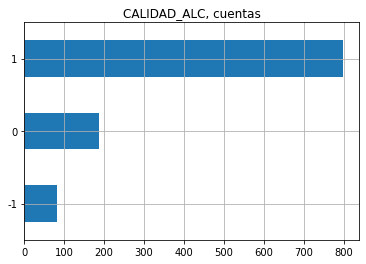

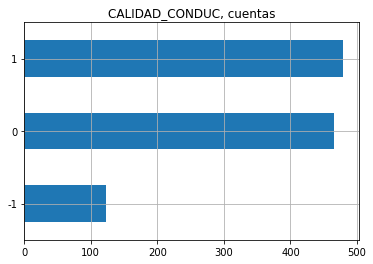

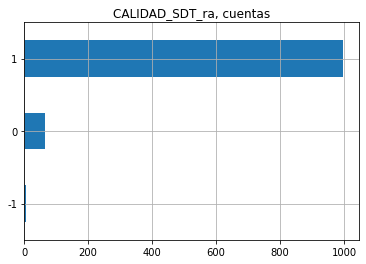

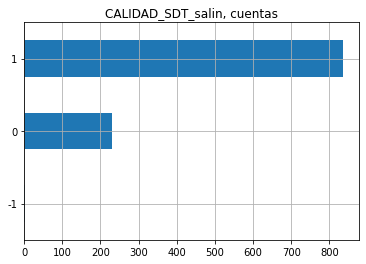

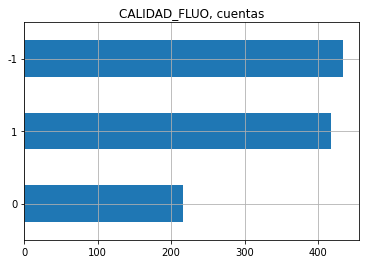

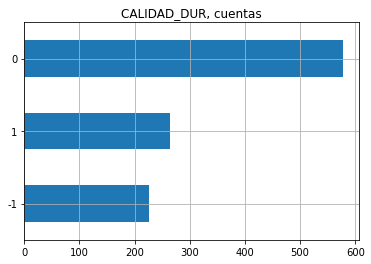

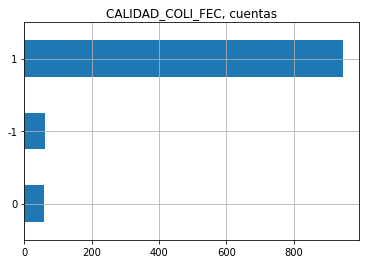

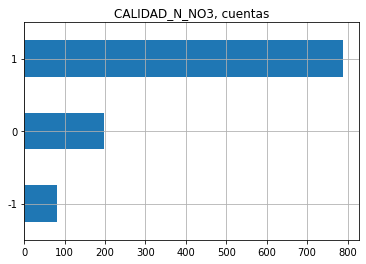

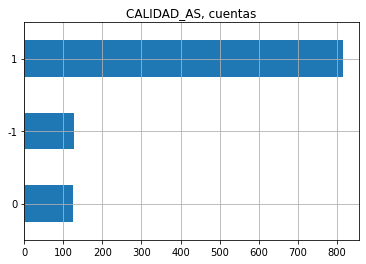

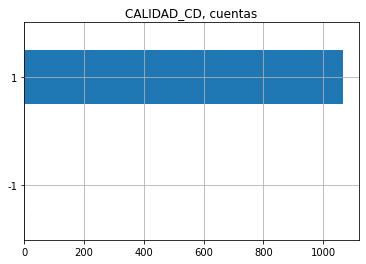

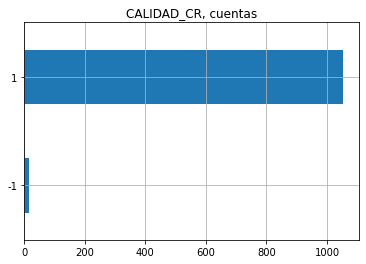

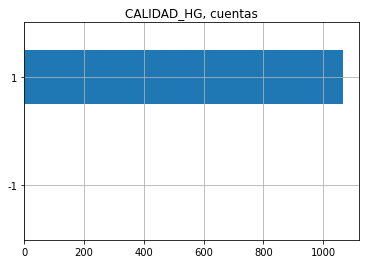

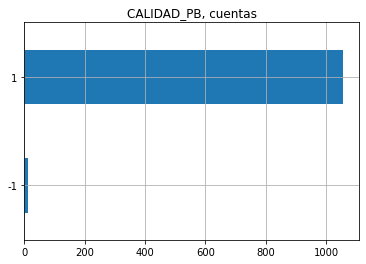

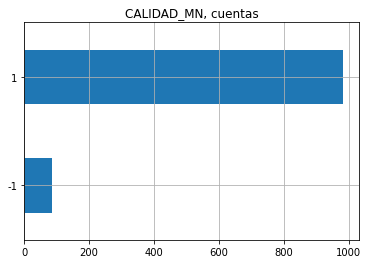

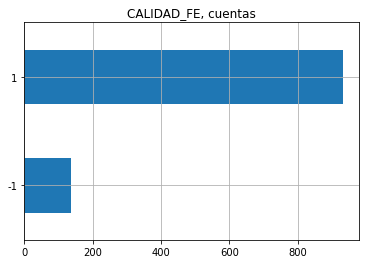

In [317]:
for col in df_sub.columns[4::]:
  df_sub[col].value_counts().sort_values().plot(kind='barh')
  plt.grid(True)
  plt.title(f'{col}, cuentas')
  plt.show()

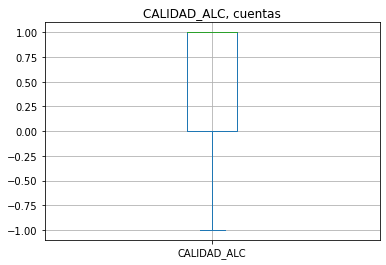

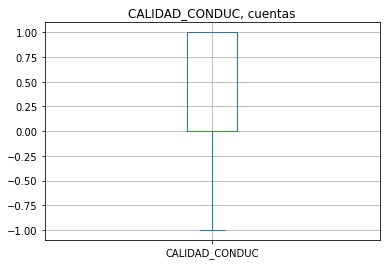

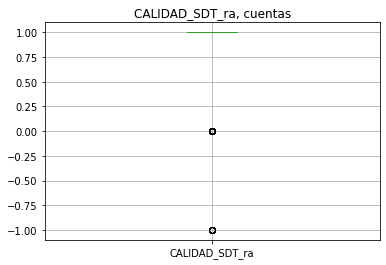

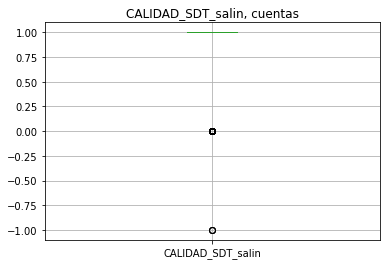

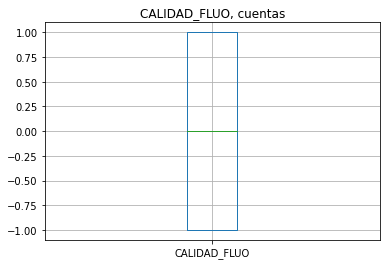

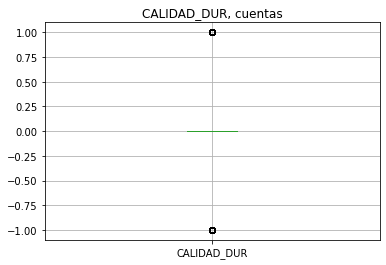

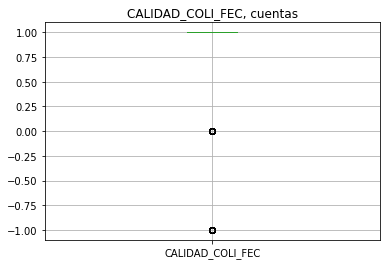

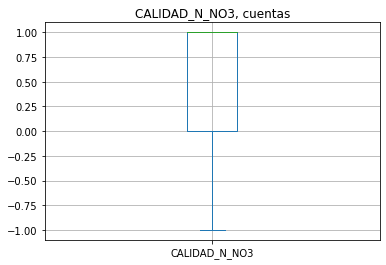

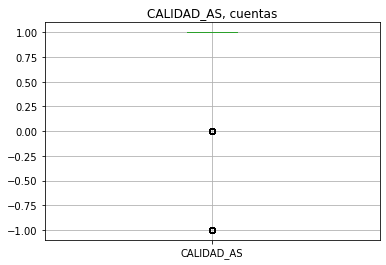

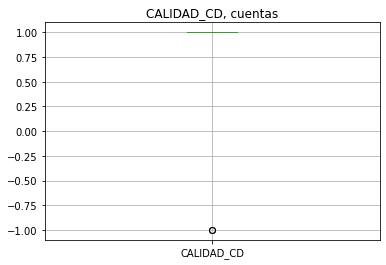

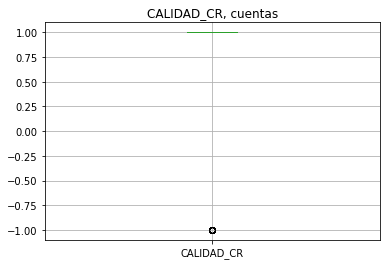

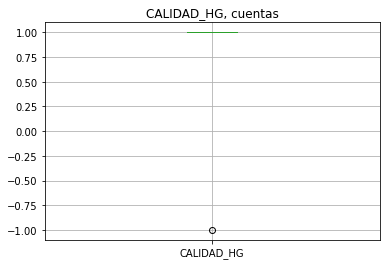

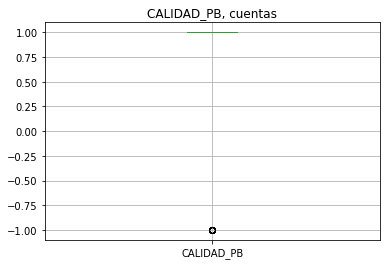

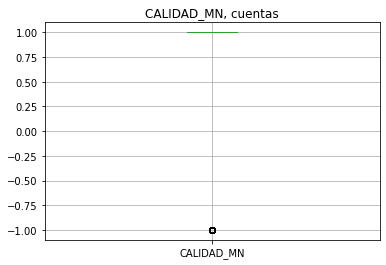

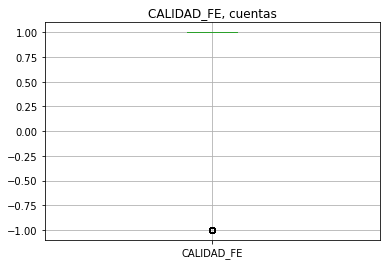

In [320]:
for col in df_sub.columns[4::]:
  df_sub[col].plot(kind='box')
  plt.grid(True)
  plt.title(f'{col}, cuentas')
  plt.show()

In [318]:
df_sub.describe()

,LONGITUD,LATITUD,CALIDAD_ALC,CALIDAD_CONDUC,CALIDAD_SDT_ra,CALIDAD_SDT_salin,CALIDAD_FLUO,CALIDAD_DUR,CALIDAD_COLI_FEC,CALIDAD_N_NO3,CALIDAD_AS,CALIDAD_CD,CALIDAD_CR,CALIDAD_HG,CALIDAD_PB,CALIDAD_MN,CALIDAD_FE
count,1068.000000,1068.000000,1068.000000,1068.000000,1068.000000,1068.000000,1068.000000,1068.000000,1068.000000,1068.000000,1068.000000,1068.000000,1068.000000,1068.000000,1068.000000,1068.000000,1068.000000
mean,-101.891007,23.163618,0.669476,0.333333,0.926966,0.779963,-0.014981,0.035581,0.829588,0.661985,0.645131,0.996255,0.971910,0.998127,0.977528,0.838951,0.745318
std,6.703263,3.887670,0.614054,0.673040,0.284401,0.421195,0.893463,0.676731,0.505810,0.614551,0.683522,0.086508,0.235463,0.061199,0.210904,0.544461,0.667021
min,-116.664250,14.561150,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000
25%,-105.388865,20.212055,0.000000,0.000000,1.000000,1.000000,-1.000000,0.000000,1.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
50%,-102.174180,22.617190,1.000000,0.000000,1.000000,1.000000,0.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
75%,-98.974716,25.510285,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
max,-86.864120,32.677713,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


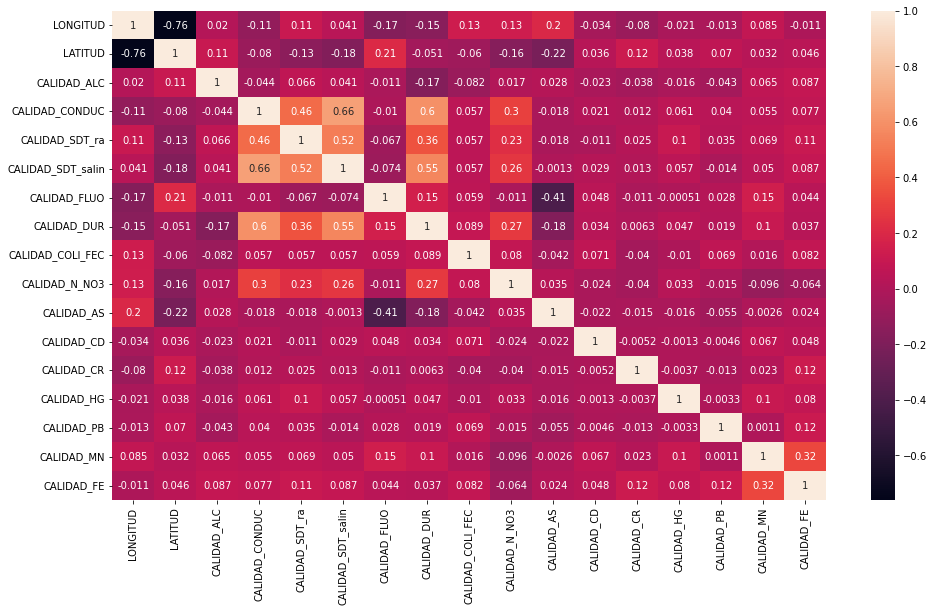

In [328]:
fig, ax = plt.subplots(1,1, figsize=(16,9))
corr = df_sub.iloc[:,2:].corr()
sns.heatmap(corr, annot=True)

([<matplotlib.axis.XTick at 0x7f3e801d43d0>,
 <a list of 19 Text major ticklabel objects>)

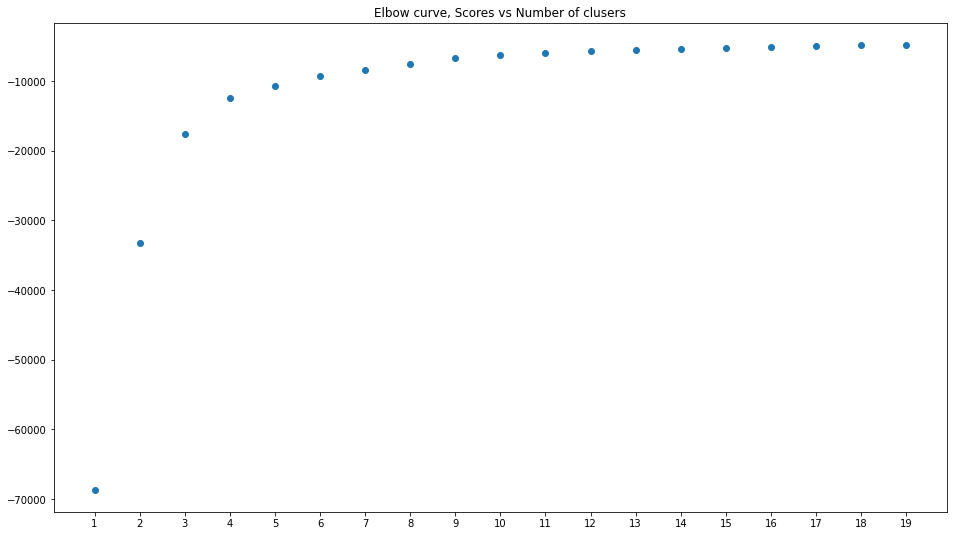

In [329]:
from sklearn.cluster import KMeans

X = df_sub.iloc[:,2:]
clusters_n = range(1,20)
kmeans = [KMeans(n_clusters=i) for i in clusters_n]
score = [kmeans[i].fit(X).score(X) for i in range(len(kmeans))]

fix, ax = plt.subplots(1,1, figsize=(16,9))
plt.scatter(x=clusters_n, y=score)
plt.title('Elbow curve, Scores vs Number of clusers')
plt.xticks(clusters_n)

In [359]:
df_temp = pd.DataFrame(kmeans[18].cluster_centers_)
df_temp.rename({0:'Longitude', 1:'Latitude'}, axis=1, inplace=True)

In [360]:
df_temp["Coordinates"] = list(zip(df_temp.Longitude, df_temp.Latitude))
df_temp["Coordinates"] = df_temp["Coordinates"].apply(Point)
gdf_temp = gpd.GeoDataFrame(df_temp, geometry="Coordinates")
gdf_temp.head()

,Longitude,Latitude,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,Coordinates
0,-97.268267,18.108239,0.851064,0.489362,0.914894,0.851064,-0.361702,-0.148936,0.978723,0.787234,0.957447,1.0,0.574468,0.957447,0.872340,0.531915,0.361702,POINT (-97.26827 18.10824)
1,-103.173786,25.497451,0.636364,-0.472727,0.618182,0.272727,0.745455,-0.563636,0.781818,-0.381818,0.072727,1.0,1.000000,1.000000,1.000000,0.963636,0.781818,POINT (-103.17379 25.49745)
2,-110.967120,28.207070,0.800000,0.276923,0.969231,0.815385,-0.261538,0.061538,0.692308,0.446154,0.646154,1.0,0.969231,1.000000,0.969231,0.907692,0.784615,POINT (-110.96712 28.20707)
3,-100.920817,20.915623,0.638554,0.650602,1.000000,0.927711,0.481928,0.469880,0.915663,0.879518,0.638554,1.0,1.000000,1.000000,1.000000,0.975904,0.903614,POINT (-100.92082 20.91562)
4,-89.175599,20.563073,0.916667,-0.183333,0.950000,0.658333,-0.583333,-0.491667,0.958333,0.783333,0.966667,1.0,0.983333,1.000000,1.000000,1.000000,0.800000,POINT (-89.17560 20.56307)


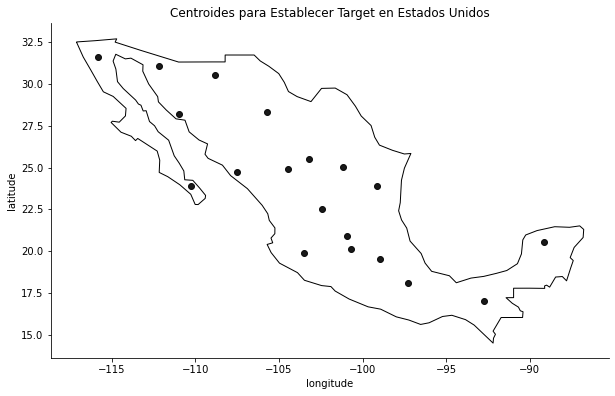

In [361]:
fig, gax = plt.subplots(figsize=(10,10))
world = gpd.read_file(gpd.datasets.get_path("naturalearth_lowres"))
world = world.set_index("iso_a3")
world.query("name == 'Mexico'").plot(ax = gax, edgecolor='black', color='white')

gdf_temp.plot(ax=gax, color='black', alpha = 0.9)

gax.set_xlabel('longitude')
gax.set_ylabel('latitude')
gax.set_title('Centroides para Establecer Target en Estados Unidos')

gax.spines['top'].set_visible(False)
gax.spines['right'].set_visible(False)

plt.show()

In [366]:
indicadoresCalidad = ['CALIDAD_ALC',	'CALIDAD_CONDUC',	'CALIDAD_SDT_ra',	'CALIDAD_SDT_salin',	'CALIDAD_FLUO',	'CALIDAD_DUR',	'CALIDAD_COLI_FEC',	'CALIDAD_N_NO3',	'CALIDAD_AS',	'CALIDAD_CD',	'CALIDAD_CR',	'CALIDAD_HG',	'CALIDAD_PB' ,'CALIDAD_MN',	'CALIDAD_FE']

0       12
1       12
2       12
3       13
4        7
        ..
1063     6
1064    10
1065     7
1066    13
1067    12
Length: 1068, dtype: int64

In [373]:
df_sub["Coordinates"] = list(zip(df_sub.LONGITUD, df_sub.LATITUD))
df_sub["Coordinates"] = df_sub["Coordinates"].apply(Point)
df_sub['SumaCalidad'] = df_sub[indicadoresCalidad].sum(axis=1)
gdf_sub = gpd.GeoDataFrame(df_sub, geometry="Coordinates")
gdf_sub.head()

,ESTADO,MUNICIPIO,LONGITUD,LATITUD,CALIDAD_ALC,CALIDAD_CONDUC,CALIDAD_SDT_ra,CALIDAD_SDT_salin,CALIDAD_FLUO,CALIDAD_DUR,CALIDAD_COLI_FEC,CALIDAD_N_NO3,CALIDAD_AS,CALIDAD_CD,CALIDAD_CR,CALIDAD_HG,CALIDAD_PB,CALIDAD_MN,CALIDAD_FE,Coordinates,SumaCalidad
0,AGUASCALIENTES,ASIENTOS,-102.02210,22.20887,1,0,1,1,1,0,1,1,0,1,1,1,1,1,1,POINT (-102.02210 22.20887),12
1,AGUASCALIENTES,AGUASCALIENTES,-102.20075,21.99958,1,1,1,1,1,0,1,0,0,1,1,1,1,1,1,POINT (-102.20075 21.99958),12
2,AGUASCALIENTES,COSIO,-102.28801,22.36685,1,1,1,1,1,0,1,1,-1,1,1,1,1,1,1,POINT (-102.28801 22.36685),12
3,AGUASCALIENTES,RINCON DE ROMOS,-102.29449,22.18435,1,1,1,1,1,0,1,1,0,1,1,1,1,1,1,POINT (-102.29449 22.18435),13
4,BAJA CALIFORNIA SUR,LA PAZ,-110.24480,23.45138,1,0,1,0,-1,0,0,-1,1,1,1,1,1,1,1,POINT (-110.24480 23.45138),7


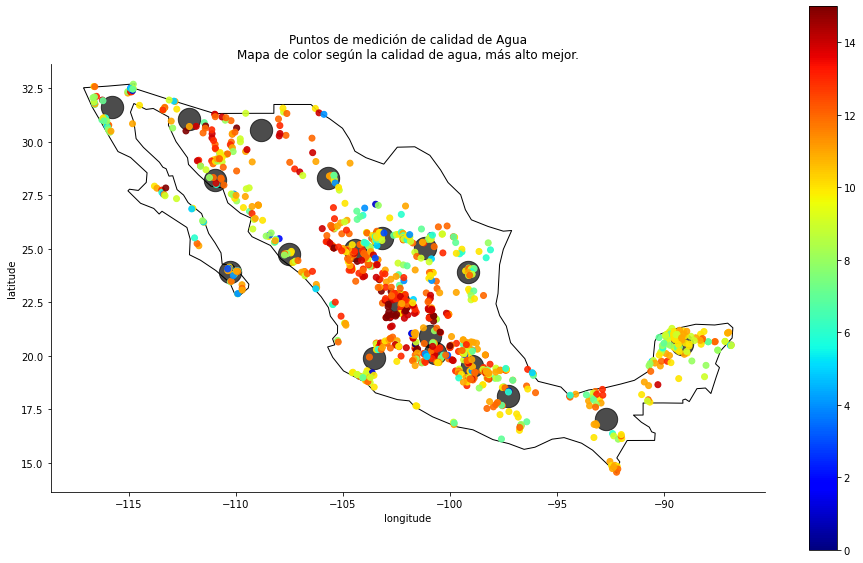

In [405]:
fig, gax = plt.subplots(figsize=(16,10))
world = gpd.read_file(gpd.datasets.get_path("naturalearth_lowres"))
world = world.set_index("iso_a3")
world.query("name == 'Mexico'").plot(ax = gax, edgecolor='black', color='white')

gdf_temp.plot(ax=gax, color='black', alpha = 0.7, markersize=500)
gdf_sub.plot(ax=gax, alpha = 0.9, cmap=plt.get_cmap('jet'), column='SumaCalidad', legend=True)

gax.set_xlabel('longitude')
gax.set_ylabel('latitude')
gax.set_title('Puntos de medición de calidad de Agua\nMapa de color según la calidad de agua, más alto mejor.')

gax.spines['top'].set_visible(False)
gax.spines['right'].set_visible(False)

plt.show()

In [401]:
kmeans[18].labels_
df_sub['K_number'] = kmeans[18].labels_

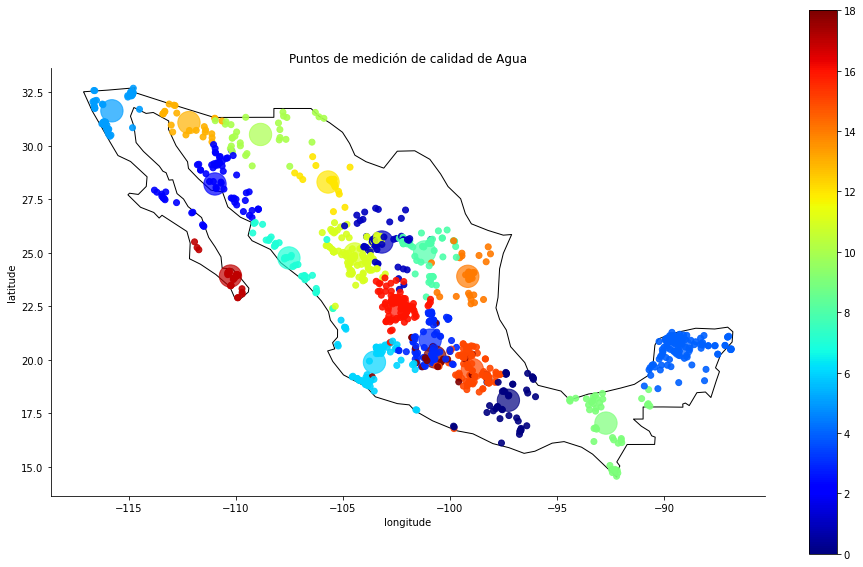

In [404]:
fig, gax = plt.subplots(figsize=(16,10))
world = gpd.read_file(gpd.datasets.get_path("naturalearth_lowres"))
world = world.set_index("iso_a3")
world.query("name == 'Mexico'").plot(ax = gax, edgecolor='black', color='white')

gdf_temp.plot(ax=gax, alpha = 0.7, cmap=plt.get_cmap('jet'), markersize=500)
gdf_sub.plot(ax=gax, alpha = 0.9, cmap=plt.get_cmap('jet'), column='K_number', legend=True)

gax.set_xlabel('longitude')
gax.set_ylabel('latitude')
gax.set_title('Puntos de medición de calidad de Agua')

gax.spines['top'].set_visible(False)
gax.spines['right'].set_visible(False)

plt.show()

In [407]:
# Correlación de agrupaciones con calidad de agua
df_sub.groupby('K_number').mean()['SumaCalidad']

K_number
0      9.617021
1      7.454545
2     10.076923
3     12.481928
4      9.758333
5      8.625000
6     10.384615
7      9.138889
8      9.962264
9     10.357143
10    11.366667
11    12.009009
12    10.400000
13    11.541667
14     8.906250
15    11.000000
16    12.975309
17     8.114286
18     5.260870
Name: SumaCalidad, dtype: float64

# Exploración y limpieza de datos
# Aguas superficiales

In [408]:
df_sup['CALIDAD_TOX_V_15'] = df_sup['CALIDAD_TOX_V_15'].replace(
     to_replace=[np.NaN,'Toxicidad alta','Toxicidad moderada','Toxicidad baja','No Toxico'], 
     value=[-99,-1, -1,1,1])
df_sup['CALIDAD_TOX_V_15'].unique()
df_sup['CALIDAD_TOX_V_15'].value_counts()

 1     1681
-99    1674
-1      138
Name: CALIDAD_TOX_V_15, dtype: int64

In [409]:
df_sup['CALIDAD_TOX_D_48'] = df_sup['CALIDAD_TOX_D_48'].replace(
     to_replace=[np.NaN,'Toxicidad alta','Toxicidad moderada','Toxicidad baja','No Toxico'], 
     value=[-99,-1, -1,1,1])
df_sup['CALIDAD_TOX_D_48'].unique()

array([-99,   1,  -1])

In [410]:
df_sup['CALIDAD_SST'] = df_sup['CALIDAD_SST'].replace(
     to_replace=[np.NaN,'Fuertemente contaminada','Contaminada','Aceptable','Buena calidad','Excelente'], 
     value=[-99,-1,-1, -0,1,1])
df_sup['CALIDAD_SST'].unique()

array([  1,  -1,   0, -99])

In [411]:
df_sup['CALIDAD_ENTEROC'] = df_sup['CALIDAD_ENTEROC'].replace(
     to_replace=[np.NaN,'Fuertemente contaminada','Contaminada','Buena calidad','Excelente'], 
     value=[-99,-1,-1,1,1])
df_sup['CALIDAD_ENTEROC'].unique()

array([-99,   1,  -1])

In [412]:
df_sup['CALIDAD_E_COLI'] = df_sup['CALIDAD_E_COLI'].replace(
    to_replace=[np.NaN,'Fuertemente contaminada','Contaminada','Aceptable','Buena calidad','Excelente'], 
    value=[-99,-1,-1, -0,1,1])
df_sup['CALIDAD_E_COLI'].unique()


array([  1, -99,  -1,   0])

In [413]:
df_sup['CALIDAD_DQO'] = df_sup['CALIDAD_DQO'].replace(
    to_replace=[np.NaN,'Fuertemente contaminada','Contaminada','Aceptable','Buena calidad','Excelente'], 
    value=[-99,-1,-1, -0,1,1])
df_sup['CALIDAD_DQO'].unique()


array([ -1, -99,   1,   0])

In [414]:
df_sup['CALIDAD_DBO'] = df_sup['CALIDAD_DBO'].replace(
    to_replace=[np.NaN,'Fuertemente contaminada','Contaminada','Aceptable','Buena calidad','Excelente'], 
    value=[-99,-1,-1, -0,1,1])
df_sup['CALIDAD_DBO'].unique()

array([  1, -99,   0,  -1])

In [415]:
df_sup['CALIDAD_COLI_FEC'] = df_sup['CALIDAD_COLI_FEC'].replace(
    to_replace=[np.NaN,'Fuertemente contaminada','Contaminada','Aceptable','Buena calidad','Excelente'], 
    value=[-99,-1,-1, -0,1,1])
df_sup['CALIDAD_COLI_FEC'].unique()


array([ -1, -99,   1,   0])

In [416]:
df_sup['CALIDAD_OD_PORC'] = df_sup['CALIDAD_OD_PORC'].replace(
    to_replace=[np.NaN,'Fuertemente contaminada','Contaminada','Aceptable','Buena calidad','Excelente'], 
    value=[-99,-1,-1, -0,1,1])
df_sup['CALIDAD_OD_PORC'].unique()

array([-99,   1,  -1,   0])

In [417]:
dfSuf_ret = [
             'ESTADO',
             'MUNICIPIO',
             'LONGITUD',
             'LATITUD',
             'CALIDAD_TOX_V_15',
             'CALIDAD_TOX_D_48',
             'CALIDAD_SST',
             'CALIDAD_ENTEROC',
             'CALIDAD_E_COLI',
             'CALIDAD_DQO',
             'CALIDAD_DBO',
             'CALIDAD_COLI_FEC',
             'CALIDAD_OD_PORC',
             ]
dfSuf_rem = [x for x in df_sup.columns if x not in dfSuf_ret]
list(dfSuf_rem)

['CLAVE',
 'SITIO',
 'ORGANISMO_DE_CUENCA',
 'CUENCA',
 'CUERPO DE AGUA',
 'TIPO',
 'SUBTIPO',
 'PERIODO',
 'DBO_mg/L',
 'DQO_mg/L',
 'SST_mg/L',
 'COLI_FEC_NMP_100mL',
 'E_COLI_NMP_100mL',
 'ENTEROC_NMP_100mL',
 'OD_PORC',
 'OD_PORC_SUP',
 'CALIDAD_OD_PORC_SUP',
 'OD_PORC_MED',
 'CALIDAD_OD_PORC_MED',
 'OD_PORC_FON',
 'CALIDAD_OD_PORC_FON',
 'TOX_D_48_UT',
 'TOX_V_15_UT',
 'TOX_D_48_SUP_UT',
 'CALIDAD TOX_D_48_SUP',
 'TOX_D_48_FON_UT',
 'CALIDAD_TOX_D_48_FON',
 'TOX_FIS_SUP_15_UT',
 'CALIDAD_TOX_FIS_SUP_15',
 'TOX_FIS_FON_15_UT',
 'CALIDAD_TOX_FIS_FON_15',
 'SEMAFORO',
 'CONTAMINANTES',
 'CUMPLE_CON_DBO',
 'CUMPLE_CON_DQO',
 'CUMPLE_CON_SST',
 'CUMPLE_CON_CF',
 'CUMPLE_CON_E_COLI',
 'CUMPLE_CON_ENTEROC',
 'CUMPLE_CON_OD',
 'CUMPLE_CON_TOX',
 'GRUPO']

In [418]:
df_sup.drop(columns = dfSuf_rem, inplace=True)

In [419]:
df_sup.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3493 entries, 0 to 3492
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   ESTADO            3493 non-null   object 
 1   MUNICIPIO         3493 non-null   object 
 2   LONGITUD          3493 non-null   float64
 3   LATITUD           3493 non-null   float64
 4   CALIDAD_DBO       3493 non-null   int64  
 5   CALIDAD_DQO       3493 non-null   int64  
 6   CALIDAD_SST       3493 non-null   int64  
 7   CALIDAD_COLI_FEC  3493 non-null   int64  
 8   CALIDAD_E_COLI    3493 non-null   int64  
 9   CALIDAD_ENTEROC   3493 non-null   int64  
 10  CALIDAD_OD_PORC   3493 non-null   int64  
 11  CALIDAD_TOX_D_48  3493 non-null   int64  
 12  CALIDAD_TOX_V_15  3493 non-null   int64  
dtypes: float64(2), int64(9), object(2)
memory usage: 354.9+ KB


In [420]:
dfSuf_NCount = [
             'ESTADO',
             'MUNICIPIO',
             'LONGITUD',
             'LATITUD',
             ]
dfSuf_Count = [x for x in df_sup.columns if x not in dfSuf_NCount]
list(dfSuf_Count)

['CALIDAD_DBO',
 'CALIDAD_DQO',
 'CALIDAD_SST',
 'CALIDAD_COLI_FEC',
 'CALIDAD_E_COLI',
 'CALIDAD_ENTEROC',
 'CALIDAD_OD_PORC',
 'CALIDAD_TOX_D_48',
 'CALIDAD_TOX_V_15']

In [ ]:
for col in df_sub.columns[4::]:
  df_sub[col].value_counts().sort_values().plot(kind='barh')
  plt.grid(True)
  plt.title(f'{col}, cuentas')
  plt.show()